Uses BERT to generate sentence embeddings and compare sentence similarity

Choose between the first 4 different cells to either get: 

    1) 3 10Qs only from Apple
    
    2) 3 10Qs from 3 different companies (Apple, Henry Jack and Associates, Oracle)
    
    3) 1 10Q fom Apple and 2 random financial documents (that aren't 10Qs) 
    
    4) 3 10Qs only from Oracle
    

In [16]:
from bert_serving.client import BertClient

In [17]:
"""
3 documents are all 10Qs from Apple 
"""

sentences = []
documents = ["0.txt", "1.txt", "2.txt"]
for doc in documents:
    doc_sent = open(f"../resources/filtered/{doc}").read().split('.')[:740]
    sentences += doc_sent
non_empty = [sentence for sentence in sentences if len(sentence) > 0]

In [23]:
"""
3 documents are 10Qs from Apple, HP, and Microsoft
"""

sentences = []
documents = ["0.txt", "102.txt", "144.txt"]
for doc in documents:
    doc_sent = open(f"../resources/filtered/{doc}").read().split('.')[:740]
    sentences += doc_sent
non_empty = [sentence for sentence in sentences if len(sentence) > 0]

In [1]:
"""
3 documents: first is an apple 10Q, the other are two non-10Q financial documents 

"""
sentences = []

sentences += open(f"../resources/filtered/0.txt").read().split('.')[:740]
call_lines = open(f"../resources/call/call.txt").read().split('\n\n')
call_sents = [sent for sent in call_lines if len(sent) > 20]
sentences += call_sents[:740]
sentences += call_sents[740:1480]
non_empty = [sentence for sentence in sentences if len(sentence) > 0]

/Users/andrew/.local/share/virtualenvs/financialsummary-uGePAaB3/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=50" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  '- or, start a new server with a larger "max_seq_len"' % self.length_limit)


[[ 0.30229375  0.51445585  0.8663824  ... -0.27670416 -0.02666094
  -0.24133253]
 [ 0.38225195  0.56831706  0.5232722  ... -0.4396592   0.41828185
   0.07431965]
 [ 0.13062873  0.56988686  0.19007398 ... -0.3400016   0.05623284
  -0.12982665]
 ...
 [-0.03623833 -0.38568616  0.5390847  ...  0.22622508  0.606936
  -0.34000096]
 [ 0.06885155 -0.46721447  0.70955676 ... -0.04252765  0.7514735
  -0.17165266]
 [-0.2978498  -0.16317499  0.62377036 ... -0.25264272  0.6219753
   0.09065066]]


In [28]:
"""
3 documents are all 10Qs from Oracle
"""

sentences = []
documents = ["142.txt", "143.txt", "144.txt"]
for doc in documents:
    doc_sent = open(f"../resources/filtered/{doc}").read().split('.')[:740]
    sentences += doc_sent
non_empty = [sentence for sentence in sentences if len(sentence) > 0]

In [29]:
bc = BertClient()
vectors=bc.encode(non_empty)

print(vectors)

[[ 0.04253573 -0.26294962  0.1983697  ... -0.13630459  0.18007901
  -0.15178469]
 [ 0.18269105  0.17392011  0.19422874 ... -0.42585295 -0.18688305
   0.43721554]
 [ 0.22661261  0.18747255 -0.05661571 ... -0.26628307 -0.4276281
   0.2220261 ]
 ...
 [ 0.19866857  0.12365238  0.4708481  ... -0.33189356 -0.03225801
   0.16957478]
 [ 0.2192139  -0.31369233  0.47788882 ... -0.34941334  0.04628737
   0.34757334]
 [ 0.15907758  0.02000103  0.47578186 ... -0.64761686 -0.36472377
  -0.11848736]]


In [32]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(vectors)
cosine

array([[1.0000001 , 0.78033435, 0.84559494, ..., 0.8091793 , 0.8356427 ,
        0.7633316 ],
       [0.78033435, 1.        , 0.77603126, ..., 0.7908614 , 0.81158555,
        0.7687616 ],
       [0.84559494, 0.77603126, 1.0000002 , ..., 0.759248  , 0.7350871 ,
        0.71286505],
       ...,
       [0.8091793 , 0.7908614 , 0.759248  , ..., 0.9999999 , 0.8996254 ,
        0.87247854],
       [0.8356427 , 0.81158555, 0.7350871 , ..., 0.8996254 , 1.0000001 ,
        0.88339686],
       [0.7633316 , 0.7687616 , 0.71286505, ..., 0.87247854, 0.88339686,
        1.0000002 ]], dtype=float32)

In [3]:
## get the maximum cosine similarities of two words

## kill off the diagonal
np.fill_diagonal(cosine, 0.0)
maxes = np.amax(cosine, 1)

print(maxes)


[0.95694653 1.00000008 0.99999991 ... 0.90351528 0.92543191 0.9608748 ]


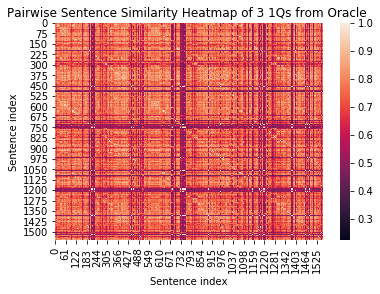

In [34]:
import seaborn
import matplotlib.pyplot as plt
# %matplotlib ipympl
seaborn.heatmap(cosine)
plt.title("Pairwise Sentence Similarity Heatmap of 3 1Qs from Oracle ")
plt.xlabel("Sentence index")
plt.ylabel("Sentence index")
plt.show()

range(0, 2095)


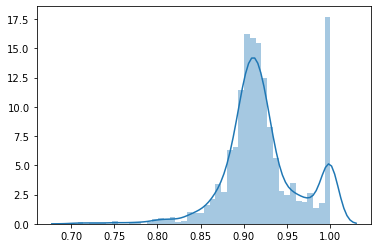

In [22]:
## plot histogram 
idcs = range(num_sent)
print(idcs)
seaborn.distplot(maxes)
# seaborn.scatterplot(list(range(num_sent)), maxes)


In [10]:
below_thresh = np.where(maxes > 1.0)
# print(below_thresh)
for low in below_thresh[0][:70]:
    print(sentences[low])

 The Company sells its products worldwide through its retail stores, online stores and direct sales force, as well as through third-party cellular network carriers, wholesalers, retailers and resellers
S
 The Act lowered the Company’s U
S
S
S
 In major states and major foreign jurisdictions, the years subsequent to 2003 generally remain open and could be subject to examination by the taxing authorities
 The State Aid Decision ordered Ireland to calculate and recover additional taxes from the Company for the period June 2003 through December 2014
S
 taxes, subject to any foreign tax credit limitations in the Act
 As of June 30, 2018, €4
S
0 billion, $10
4 billion was repurchased under the Company’s previous share repurchase program of up to $210 billion, thereby completing that program
 The Company’s new share repurchase program does not obligate it to acquire any specific number of shares
The Company offers an iPhone Upgrade Program, which is available to customers who purchase a quali